# Importing Libraries

In [2]:
# !pip install imbalanced-learn
# !pip install -U scikit-learn

In [36]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, StratifiedKFold, LeaveOneOut, cross_val_predict
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report, accuracy_score, roc_auc_score, roc_curve
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.naive_bayes import GaussianNB
from numpy import mean, std


# Importing the Dataset

In [4]:
df=pd.read_csv("diabetes.csv")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Descriptive Analysis

In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df["Outcome"].dtypes

dtype('int64')

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Plots

### Histogram

Text(0.5, 1.0, 'Diabetes Patient')

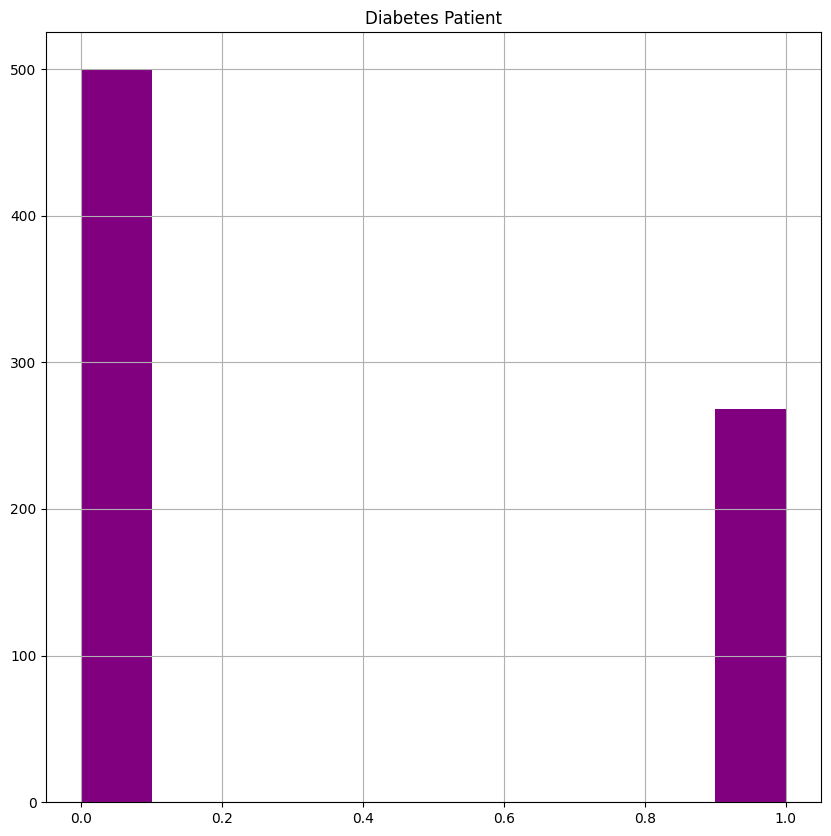

In [12]:
ourplot= df['Outcome'].hist(figsize = (10,10), color ='purple')
plt.title('Diabetes Patient')

### Pairplot

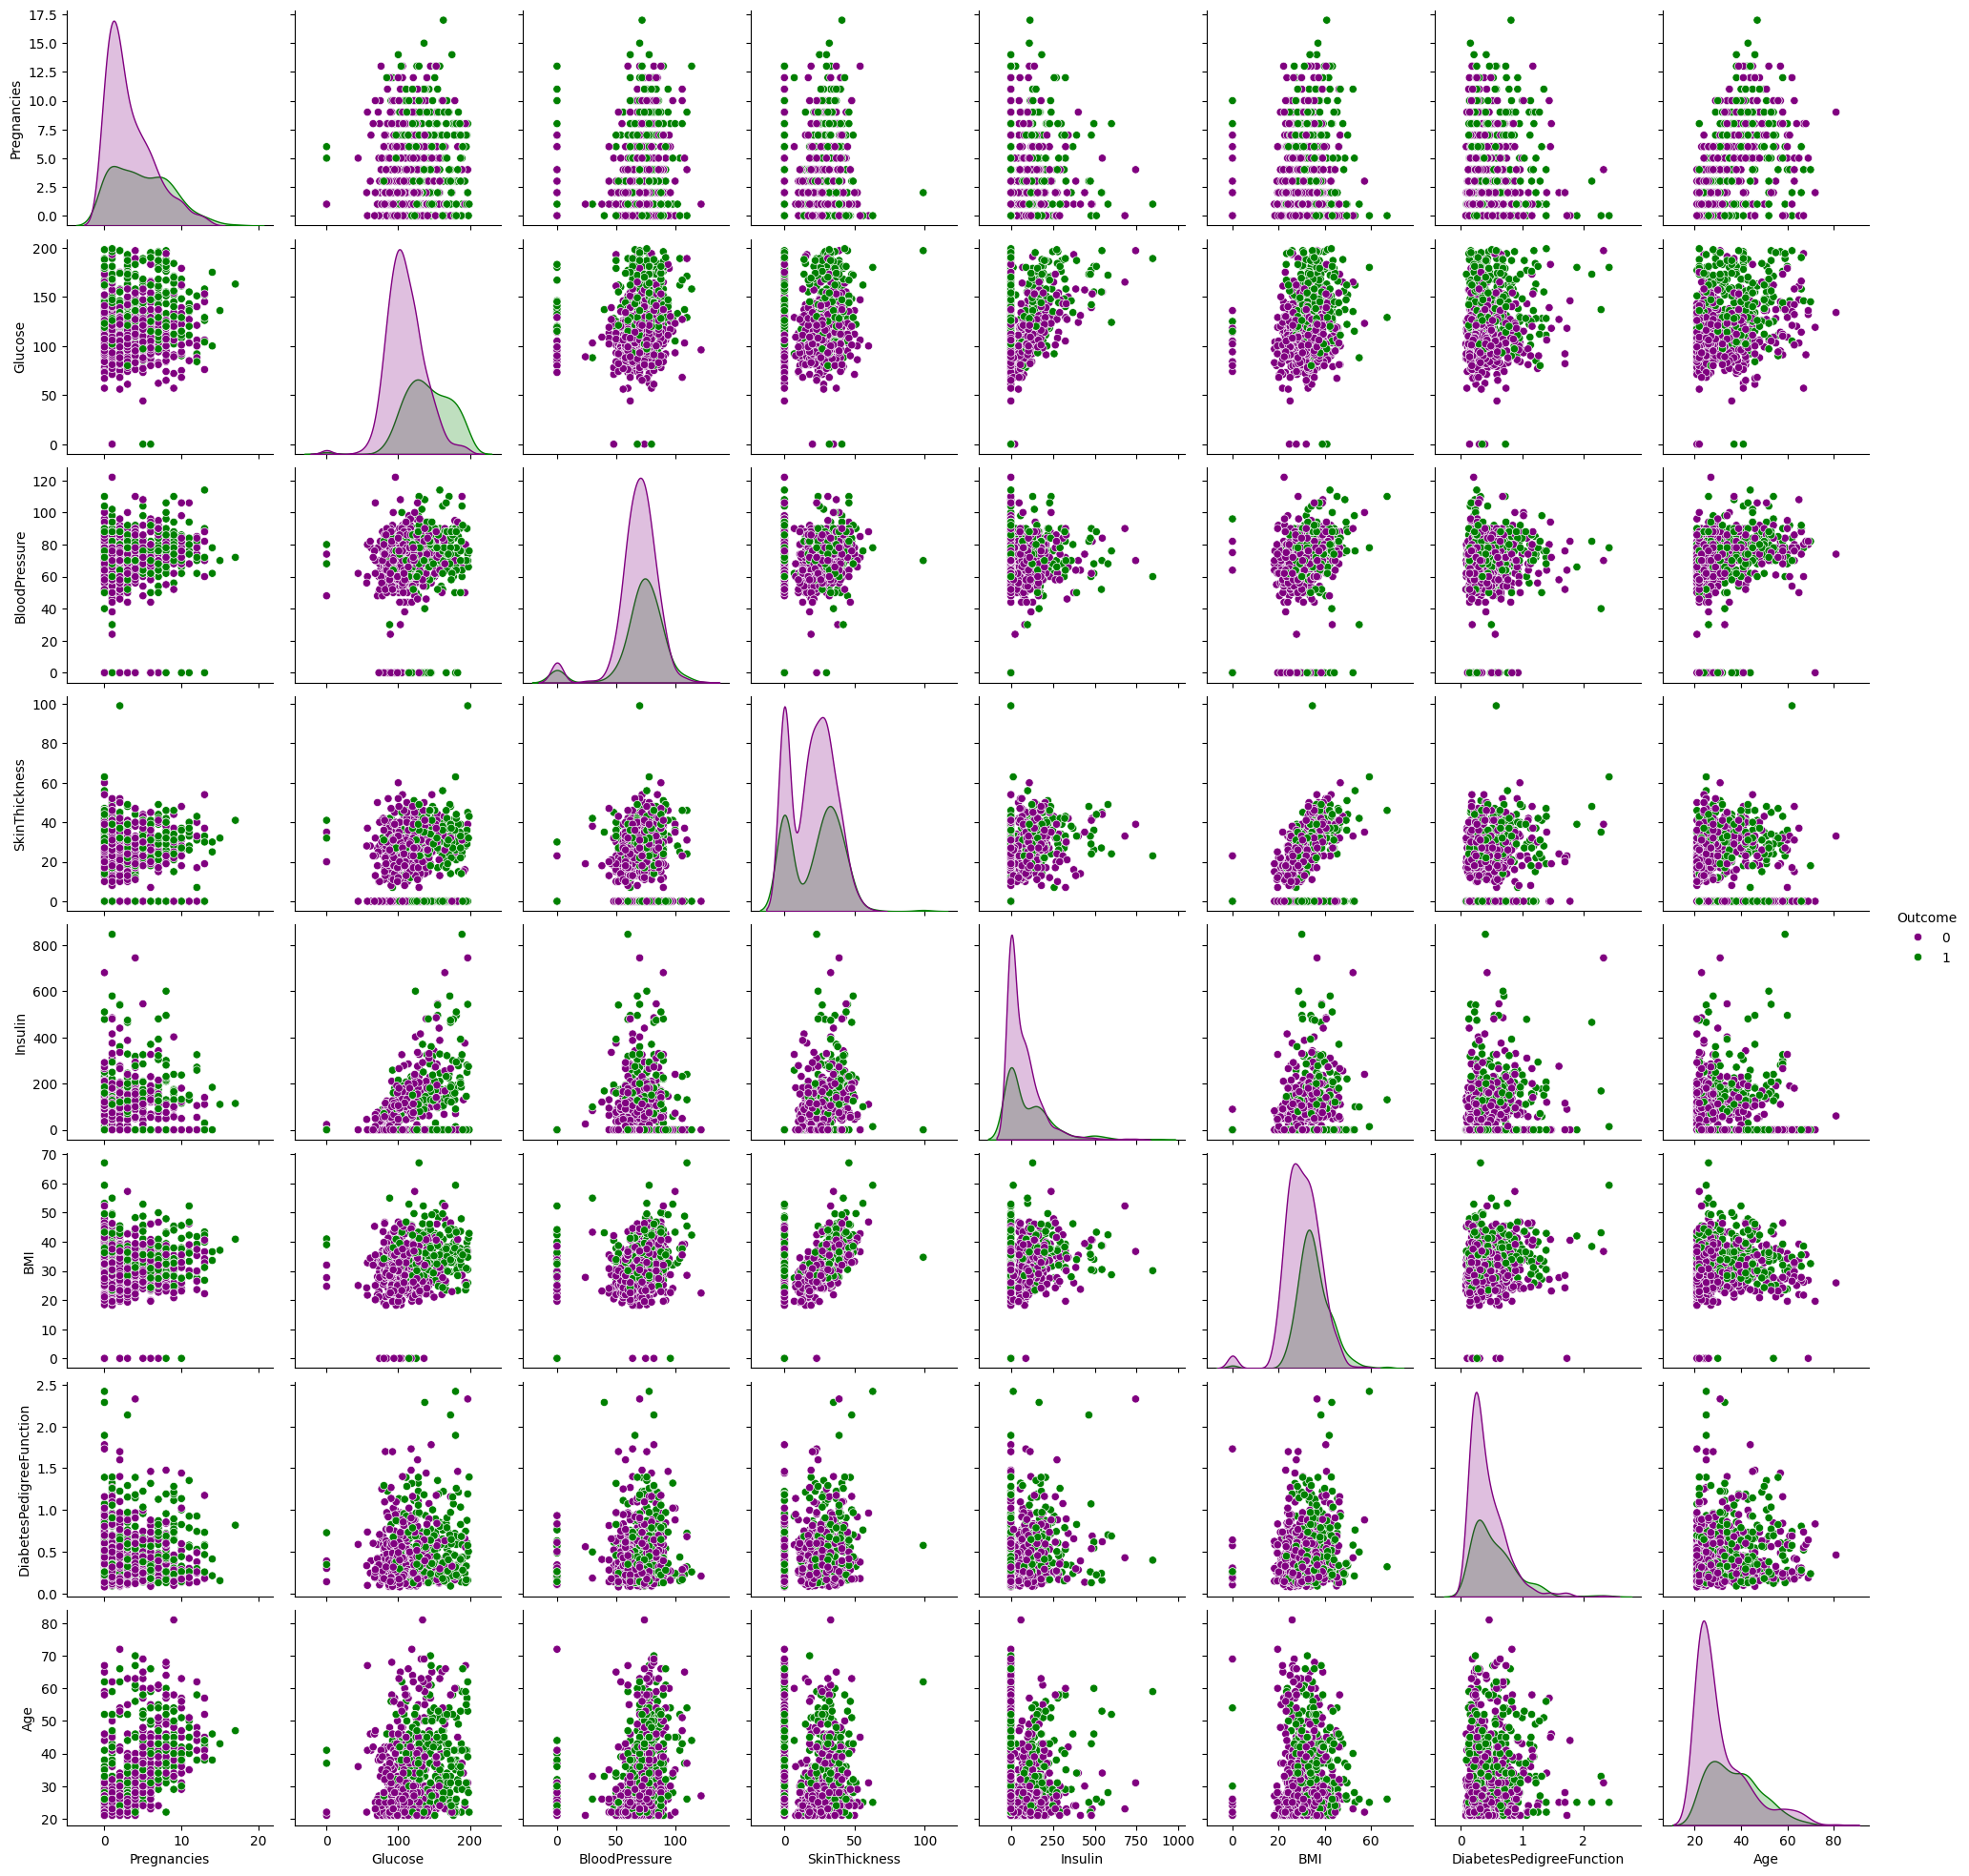

In [13]:
sns.pairplot(df,hue='Outcome',palette = ["purple","green"])
plt.show()

### Heatmap

<Axes: >

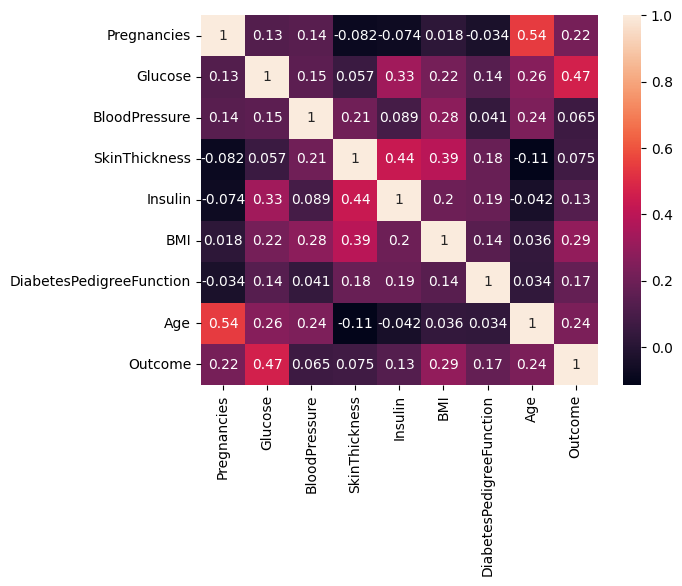

In [14]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

## Duplicate Rows

In [15]:
df.duplicated().sum()

0

## Finding Missing Values

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df_ADD = df.drop_duplicates()
df_ADD
df_ADD.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### checking '?'  in dataset

In [18]:
for i in df_ADD.columns:
    print(i,len(df_ADD[df[i] == '?']))

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 0


### checking '0' value in dataset

In [19]:
for i in df_ADD.columns:
    print(i,len(df_ADD[df[i] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


## Outlier detection

### 6 Sigma method

In [20]:
temp = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

df_ADD2 = df_ADD.copy()

for i in temp:
    lower_limit = df_ADD[i].mean() -3*df_ADD[i].std()
    upper_limit = df_ADD[i].mean() +3*df_ADD[i].std()
    outlier = df_ADD[(df_ADD[i] > upper_limit) | (df_ADD[i] < lower_limit)]
    print(i + ':')
    display( outlier)
    print('\n')

Pregnancies:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1




Glucose:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1




BloodPressure:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1




SkinThickness:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1




Insulin:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
111,8,155,62,26,495,34.0,0.543,46,1
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
286,5,155,84,44,545,38.7,0.619,34,0
370,3,173,82,48,465,38.4,2.137,25,1




BMI:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
445,0,180,78,63,14,59.4,2.420,25,1
494,3,80,0,0,0,0.0,0.174,22,0




DiabetesPedigreeFunction:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
228,4,197,70,39,744,36.7,2.329,31,0
330,8,118,72,19,0,23.1,1.476,46,0
370,3,173,82,48,465,38.4,2.137,25,1
371,0,118,64,23,89,0.0,1.731,21,0
395,2,127,58,24,275,27.7,1.600,25,0
445,0,180,78,63,14,59.4,2.420,25,1
593,2,82,52,22,115,28.5,1.699,25,0




Age:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
666,4,145,82,18,0,32.5,0.235,70,1
684,5,136,82,0,0,0.0,0.640,69,0


### Replace outliers by lower_limit and upper_limit

In [21]:
cleaned_df = df.copy() 

for col in df.columns:
  
        lower_limit = df_ADD[col].mean() - 3 * df_ADD[col].std()
        upper_limit = df_ADD[col].mean() + 3 * df_ADD[col].std()

       
      
        cleaned_df[col] = df_ADD[col].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

cleaned_df = df_ADD
df_ADD

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Handling Missing Values

#### Lets check the '0' value in columns again 

In [22]:
for i in df_ADD.columns:
    print(i,len(df_ADD[df[i] == 0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


#### Replace '0' value by 'nan'

In [23]:
df_ADD[['Glucose','BloodPressure','SkinThickness' , 'BMI', 'Insulin']]=df_ADD[['Glucose','BloodPressure','SkinThickness' , 'BMI', 'Insulin']].replace(0,np.nan)
df_ADD.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
df_3Sigma=df_ADD
df_3Sigma_1=df_3Sigma.copy(deep=True)
df_3Sigma_1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Find the best  way to replace missing values

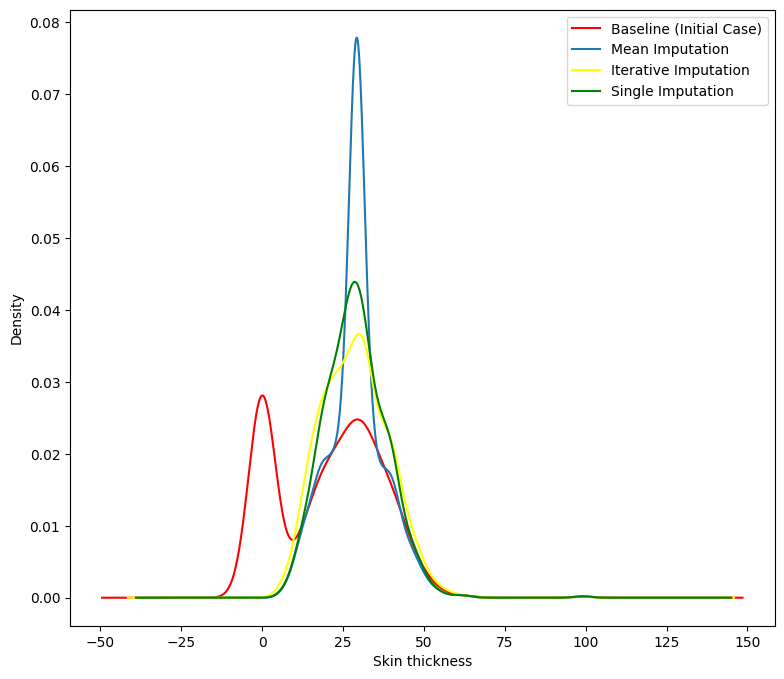

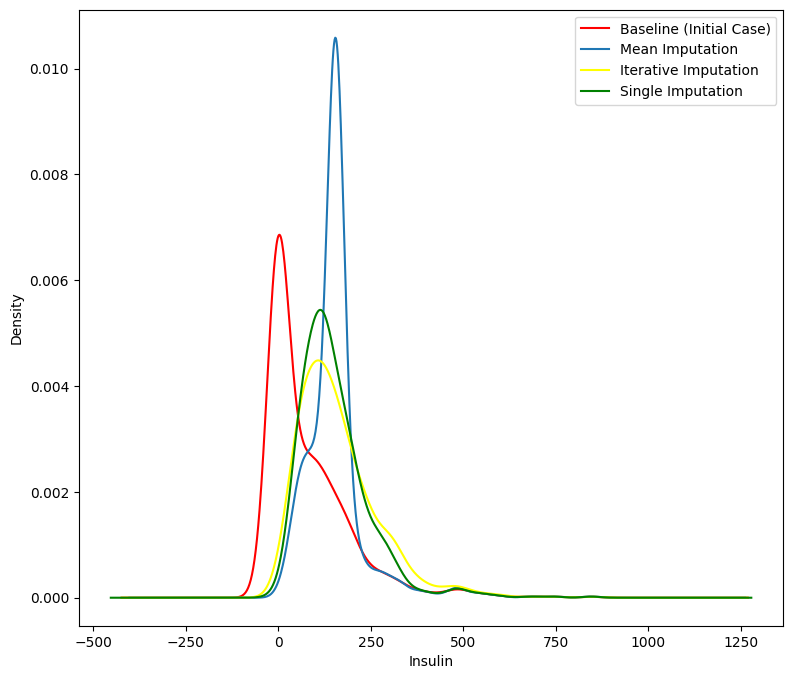

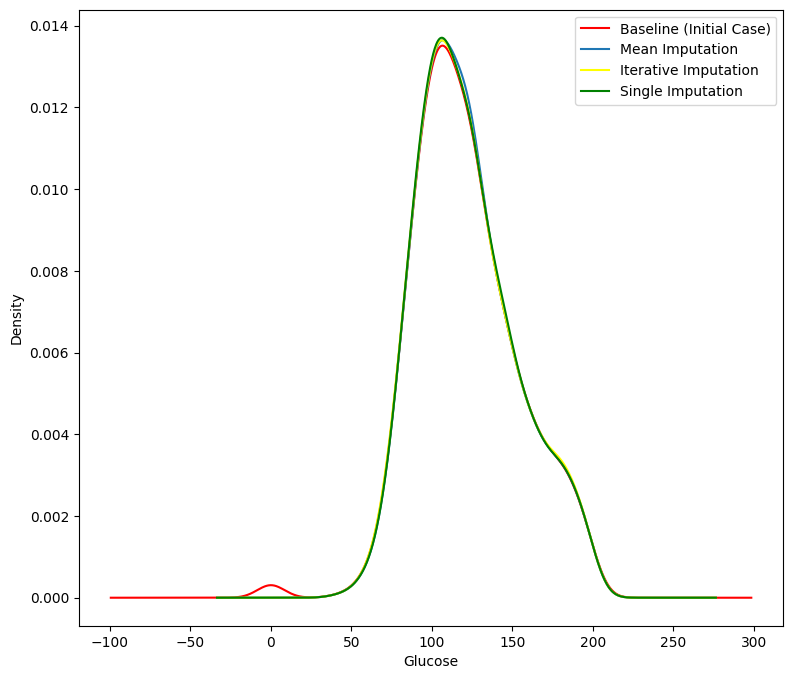

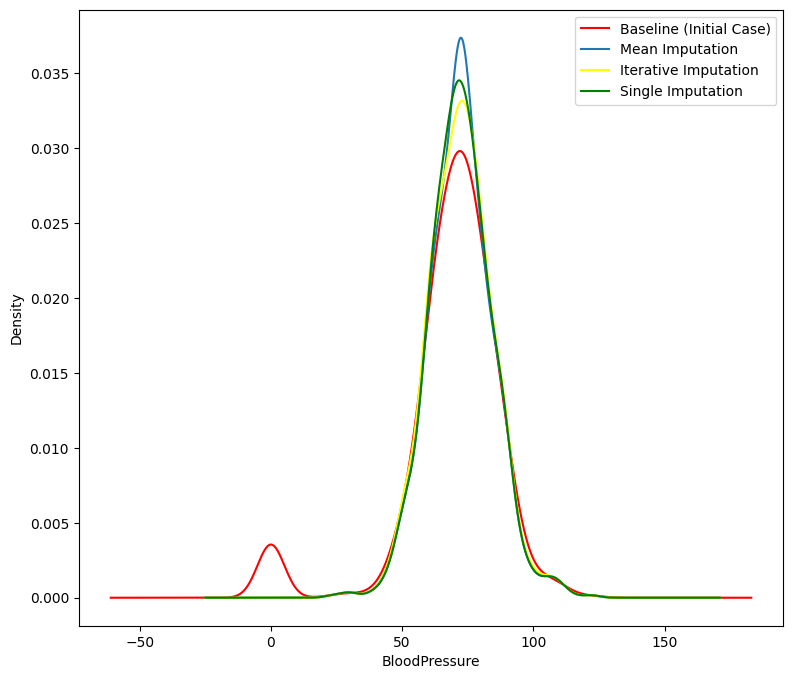

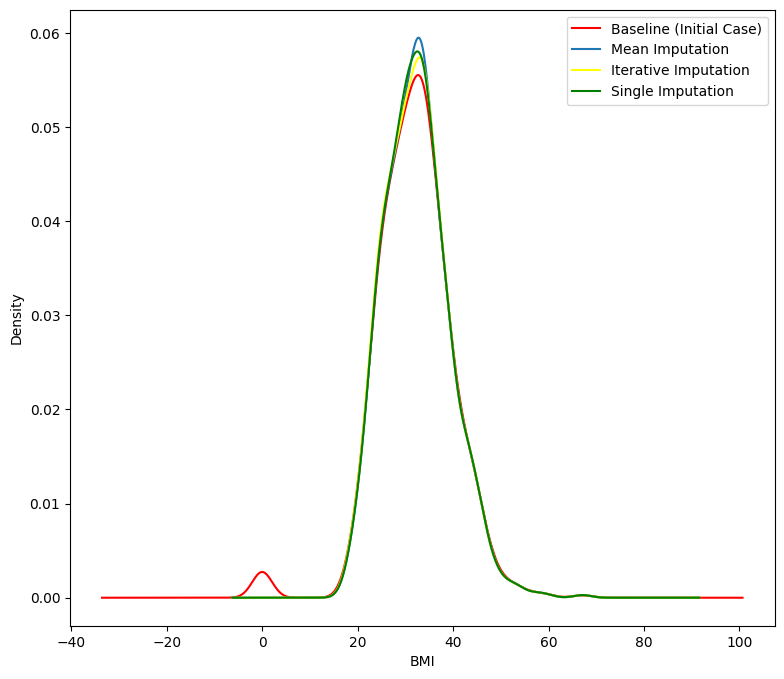

In [25]:
# Single Imputer
SingleImputer = IterativeImputer(missing_values=np.nan)
DfSingle = df_3Sigma.copy(deep=True)
DfSingle.iloc[:, :] = SingleImputer.fit_transform(DfSingle)

# Mean Imputer
MeanImputer =SimpleImputer(missing_values=np.nan, strategy='mean')
DfMean = df_3Sigma_1.copy(deep=True)
DfMean.iloc[:, :] = MeanImputer.fit_transform(DfMean)

# Iterative Imputer
IterativeImputer = IterativeImputer(missing_values=np.nan, sample_posterior=True, min_value=0,
                                    random_state=0)
DfIterative = df_3Sigma_1.copy(deep=True)
DfIterative.iloc[:, :] = IterativeImputer.fit_transform(DfIterative)


plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['SkinThickness'].plot(kind='kde', c='red')
DfMean['SkinThickness'].plot(kind='kde')
DfIterative['SkinThickness'].plot(kind='kde', c='yellow')
DfSingle['SkinThickness'].plot(kind='kde', c='green')
labels = ['Baseline (Initial Case)', 'Mean Imputation', 'Iterative Imputation',
'Single Imputation']

plt.legend(labels)
plt.xlabel('Skin thickness')
plt.show()


plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
df['Insulin'].plot(kind='kde', c='red')
DfMean['Insulin'].plot(kind='kde')
DfIterative['Insulin'].plot(kind='kde', c='yellow')
DfSingle['Insulin'].plot(kind='kde', c='green')
labels = ['Baseline (Initial Case)', 'Mean Imputation', 'Iterative Imputation',
'Single Imputation']

plt.legend(labels)
plt.xlabel('Insulin')
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['Glucose'].plot(kind='kde', c='red')
DfMean['Glucose'].plot(kind='kde')
DfIterative['Glucose'].plot(kind='kde', c='yellow')
DfSingle['Glucose'].plot(kind='kde', c='green')
labels = ['Baseline (Initial Case)', 'Mean Imputation', 'Iterative Imputation',
'Single Imputation']

plt.legend(labels)
plt.xlabel('Glucose')
plt.show()


plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['BloodPressure'].plot(kind='kde', c='red')
DfMean['BloodPressure'].plot(kind='kde')
DfIterative['BloodPressure'].plot(kind='kde', c='yellow')
DfSingle['BloodPressure'].plot(kind='kde', c='green')
labels = ['Baseline (Initial Case)', 'Mean Imputation', 'Iterative Imputation',
'Single Imputation']

plt.legend(labels)
plt.xlabel('BloodPressure')
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['BMI'].plot(kind='kde', c='red')
DfMean['BMI'].plot(kind='kde')
DfIterative['BMI'].plot(kind='kde', c='yellow')
DfSingle['BMI'].plot(kind='kde', c='green')
labels = ['Baseline (Initial Case)', 'Mean Imputation', 'Iterative Imputation',
'Single Imputation']

plt.legend(labels)
plt.xlabel('BMI')
plt.show()

## Note
By paying attention to the last plots, we chose method Iterative
,It is more samiler than others to Baseline

In [26]:
DfIterative

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,336.600681,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,135.143610,26.6,0.351,31,0
2,8,183.0,64.0,15.233512,364.582727,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,304.312741,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,30.373750,125.232775,30.1,0.349,47,1


In [27]:
DfIterative.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df_AOD_3Sigma =DfIterative
df_AOD_3Sigma

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,336.600681,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,135.143610,26.6,0.351,31,0
2,8,183.0,64.0,15.233512,364.582727,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,304.312741,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,30.373750,125.232775,30.1,0.349,47,1


# Standardization

In [30]:
Min_Max_Scaled = MinMaxScaler().fit_transform(DfIterative)
df_Min_Max = pd.DataFrame(Min_Max_Scaled, columns = list(DfIterative.columns))
df_Min_Max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.316818,0.397873,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.252770,0.159744,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.105817,0.430949,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.188722,0.111111,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.316818,0.198582,0.509202,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.455590,0.212766,0.300613,0.039710,0.700000,0.0
764,0.117647,0.503226,0.469388,0.231421,0.359708,0.380368,0.111870,0.100000,0.0
765,0.294118,0.496774,0.489796,0.188722,0.132388,0.163599,0.071307,0.150000,0.0
766,0.058824,0.529032,0.367347,0.267434,0.148029,0.243354,0.115713,0.433333,1.0


# Train Test Split

In [31]:
y = df_Min_Max['Outcome']
X = df_Min_Max.drop('Outcome', axis = 1)

### Hold Out method

In [38]:
# Assuming y is the continuous target variable
# Convert continuous target variable into discrete classes
label_encoder =LabelEncoder()
y = label_encoder.fit_transform(y)


### Train Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=7)
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train_transformed, y_train) 
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.7323420074349443

In [40]:
X_test.shape, y_test.shape

((269, 8), (269,))

In [41]:
X_train.shape, y_train.shape

((499, 8), (499,))

# Handling Data Imbalancing

## The count of each value in the y column

In [42]:
import matplotlib.pyplot as plt
counts = df["Outcome"].value_counts()
counts

Outcome
0    500
1    268
Name: count, dtype: int64

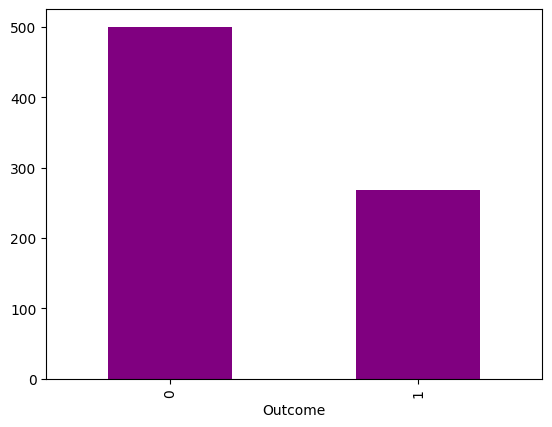

In [43]:
counts.plot(kind="bar", color ='purple')
plt.show()

## Oversampling

In [44]:
y_train_discrete = np.where(y_train > 0, 1, 0)

sm = SMOTE(random_state=2)

print("\nClass 1 before Over Sampling --> ", sum(y_train_discrete == 1))
print("\nClass 0 before Over Sampling --> ", sum(y_train_discrete == 0))

X_train_OS, y_train_OS = sm.fit_resample(X_train, y_train_discrete)

print("\nThe shape of X after Over Sampling -->", X_train_OS.shape)
print("\nThe shape of Y after Over Sampling -->", y_train_OS.shape)

print("\nClass 1 after Over Sampling --> ", sum(y_train_OS == 1))
print("\nClass 0 after Over Sampling --> ", sum(y_train_OS == 0))
print("\n")



Class 1 before Over Sampling -->  173

Class 0 before Over Sampling -->  326

The shape of X after Over Sampling --> (652, 8)

The shape of Y after Over Sampling --> (652,)

Class 1 after Over Sampling -->  326

Class 0 after Over Sampling -->  326




# Feature Selection

## Forward Feature Selection Method

In [45]:
forward_feature_selection = (SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=5 , metric='euclidean'),
                                                      k_features = (1,8),
                                                      forward=True,
                                                      floating=False,
                                                      verbose=2,
                                                      scoring='accuracy',
                                                      cv = 5)).fit(X_train_OS, y_train_OS)

forward_columns = list(forward_feature_selection.k_feature_names_)
print("\nNo. of Selected columns : ", len(forward_columns))
print("Selected features by forward --->",forward_columns)
X_train_forward = X_train_OS[forward_columns]
X_test_forward = X_test[forward_columns]
X_train_forward

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameter


No. of Selected columns :  4
Selected features by forward ---> ['Glucose', 'Insulin', 'BMI', 'Age']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2024-04-12 10:35:57] Features: 8/8 -- score: 0.7899236641221374

,Glucose,Insulin,BMI,Age
0,0.445161,0.113021,0.261759,0.000000
1,0.109677,0.126941,0.331288,0.416667
2,0.406452,0.337366,0.130879,0.216667
3,0.400000,0.186761,0.259714,0.050000
4,0.412903,0.210402,0.353783,0.050000
...,...,...,...,...
647,0.713280,0.171467,0.140796,0.553632
648,0.902803,0.185614,0.298215,0.178472
649,0.987097,0.616046,0.263977,0.555065
650,0.475860,0.167844,0.337335,0.053974


## Test the model

In [46]:
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(X_train_forward, y_train_OS)
y_pred = model.predict(X_test_forward)
accuracy = accuracy_score(y_test, y_pred)

### Find Accuracy

In [47]:
print("Accuracy of the model with selected features: {:.2f}".format(accuracy))

Accuracy of the model with selected features: 0.71


### Find Sensitivity

In [48]:
print(' Sensitivity :', recall_score(y_test, y_pred))

 Sensitivity : 0.6947368421052632


### Find Precision

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]

specificity = TN / (TN + FP)
print("Specificity of the model with selected features: {:.2f}".format(specificity))

Specificity of the model with selected features: 0.72


# KNN

We have done the holdout and over sampling before. Now we will train a KNN model based on the prepared dataset

In [50]:
# X_train_forward , y_train_OS , X_test_forward, y_test

m equals to 652, sqrt of m equals to 25.53 so we will search the best K from 1 to 25

### For finding the suitable K, we will use grid search

In [51]:
# Define the range of K values to search
k_values = list(range(1, 26))  

# Train KNN models with different K values and calculate validation accuracy
val_scores = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_forward, y_train_OS)
    y_pred = model.predict(X_test_forward)
    accuracy = accuracy_score(y_test, y_pred)
    val_scores.append(accuracy)

# Find the best K value
best_k = k_values[np.argmax(val_scores)]
print("Best K:", best_k)


Best K: 12


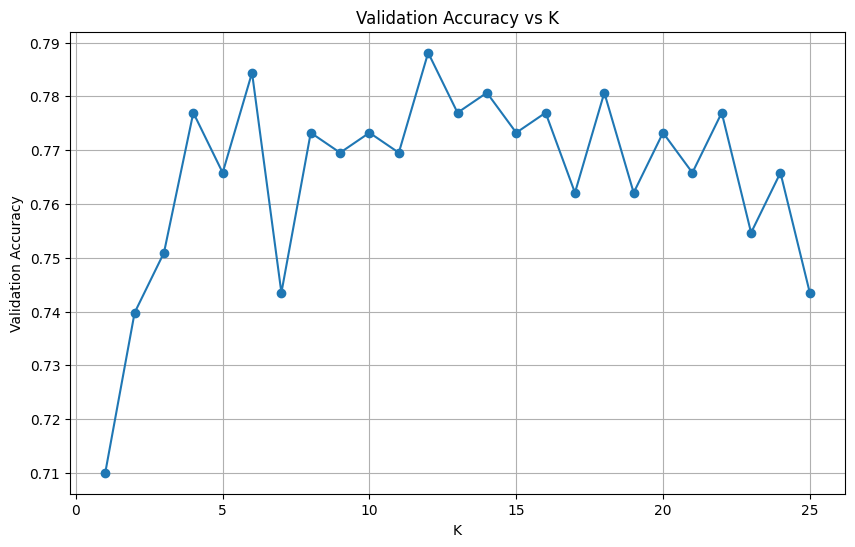

In [52]:
# Plot accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_scores, marker='o', linestyle='-')
plt.xlabel('K')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs K')
plt.grid(True)
plt.show()

## So the best K is 12

In [53]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train_forward, y_train_OS)
y_pred = model.predict(X_test_forward)

### confusion matrix

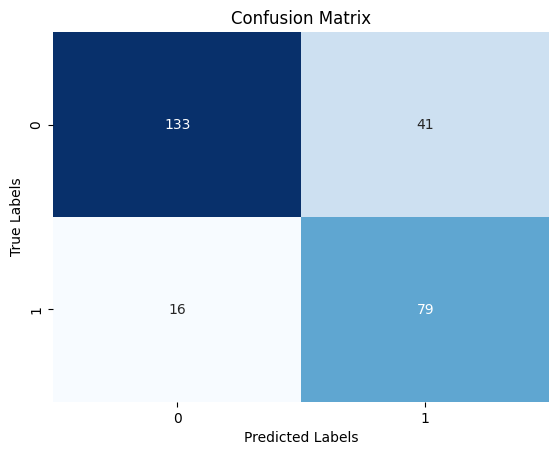

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## finding accuracy, sensitivity, specificity

In [55]:
# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

### accuracy

In [56]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7881040892193308

### sensitivity

In [57]:
sensitivity = tp / (tp + fn)
sensitivity

0.8315789473684211

### specificity

In [58]:
specificity = tn / (tn + fp)
specificity

0.764367816091954

## Leave one out CV 

In [53]:
cv = LeaveOneOut()

# Perform LOOCV and make predictions
y_pred = cross_val_predict(model, X_train_forward, y_train_OS, cv=cv, n_jobs=-1)

# Calculate accuracy
accuracy = accuracy_score(y_train_OS, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train_OS, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate sensitivity and specificity
true_negative = conf_matrix[0, 0]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
true_positive = conf_matrix[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Accuracy: 0.7791411042944786
Confusion Matrix:
[[240  86]
 [ 58 268]]
Sensitivity: 0.8220858895705522
Specificity: 0.7361963190184049


## Bayesian classification

In [54]:
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train_forward, y_train_OS)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test_forward)

### confusion matrix

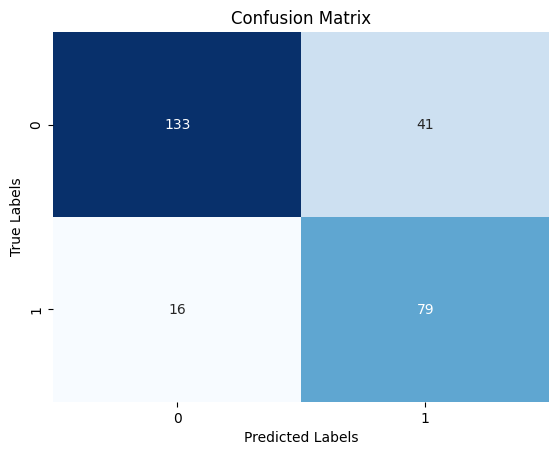

In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### accuracy

In [60]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7881040892193308

### sensitivity

In [61]:
sensitivity = tp / (tp + fn)
sensitivity

0.8315789473684211

### specificity

In [62]:
specificity = tn / (tn + fp)
specificity

0.764367816091954